Code Used for Analysis of Membrane Deformation with Some Usage Examples

Jan Steinkühler <jst@tf.uni-kiel.de>

Paper Preprint: https://www.biorxiv.org/content/10.1101/2022.06.01.494374v1.abstract


Center protein in box
 gmx trjconv -f prod.xtc -o prod.center.xtc -s prod.tpr -center

In [3]:
import MDAnalysis as md
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.leaflet import LeafletFinder, optimize_cutoff
from scipy.interpolate import griddata
#plt.style.use("../mystyle-paper.mplstyle")
import pandas as pd

In [3]:
def get_avg(u,grid):
    data_u=[]
    data_l=[]
    #u.trajectory[-1]
    c=u.select_atoms("protein")
    L = LeafletFinder(u, 'name P*')
    L0 = L.group(0)
    L1 = L.group(1)
    #grid=range(10,80,10)
    for ts in u.trajectory[3::1]:
        z0=L0.centroid()[2]-L1.centroid()[2]
        center=z0/2+L1.centroid()[2]
        c=u.select_atoms("protein").center_of_geometry()
        d=np.sqrt((L.group(0).positions[:,0]-c[0])**2+(L.group(0).positions[:,1]-c[1])**2)
        data_u.append(griddata(d, L.group(0).positions[:,2], grid, method='nearest'))
        d=np.sqrt((L.group(1).positions[:,0]-c[0])**2+(L.group(1).positions[:,1]-c[1])**2)
        data_l.append(griddata(d, L.group(1).positions[:,2], grid, method='nearest'))
    avg_l=np.mean(data_l,axis=0)
    avg_u=np.mean(data_u,axis=0)
    return[avg_l,avg_u]

In [4]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dypc-PL145/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dypc-PL145/prod.center.xtc")

In [5]:
grid=range(10,80,10)

In [6]:
[avg_l,avg_u]=get_avg(u,grid)

In [7]:
d_dypc=(avg_u-avg_l)/10

In [8]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dopc-PL145/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dopc-PL145/prod.center.xtc")

In [9]:
[avg_l,avg_u]=get_avg(u,grid)

In [10]:
L = LeafletFinder(u, 'name P*')
L0 = L.group(0)
L1 = L.group(1)

In [11]:
#plt.plot(grid,avg_l,'.')
#plt.plot(grid,avg_u,'.')
d_dopc=(avg_u-avg_l)/10

In [12]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dgpc-PL145/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dgpc-PL145/prod.center.xtc")

In [13]:
[avg_l,avg_u]=get_avg(u,grid)

In [14]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dgpc-PL145/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dgpc-PL145/prod.center.xtc")

In [15]:
[avg_l,avg_u]=get_avg(u,grid)

In [16]:
L = LeafletFinder(u, 'name P*')
L0 = L.group(0)
L1 = L.group(1)
d_dgpc=(avg_u-avg_l)/10

In [17]:
grid_plot=range(1,8,1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


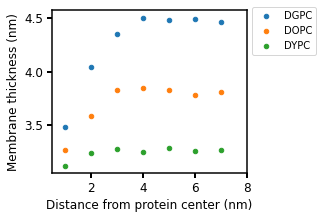

In [18]:
fig=plt.figure(figsize=(3.5, 3))
plt.plot(grid_plot,d_dgpc,'.',label="DGPC")
plt.plot(grid_plot,d_dopc,'.',label="DOPC")
plt.plot(grid_plot,d_dypc,'.',label="DYPC")
plt.xlim([0.5, 8])
#plt.hlines(2.8,0,9,colors='gray', linestyles='solid',label="PL145")
plt.legend(bbox_to_anchor=(1, 1.0, 0.2, 0.05), loc='upper left')
plt.xlabel("Distance from protein center (nm)")
plt.ylabel("Membrane thickness (nm)")
plt.savefig("EAGER_report.pdf")

In [19]:
data={'Distance [nm]':grid_plot,'dgpc':d_dgpc,'dypc':d_dypc,'dopc':d_dopc}

In [20]:
df=pd.DataFrame(data)

In [21]:
df

Distance [nm]      dgpc      dypc      dopc
0              1  3.478638  3.116771  3.262578
1              2  4.040709  3.234445  3.584698
2              3  4.354445  3.270353  3.828686
3              4  4.504900  3.250353  3.846111
4              5  4.481364  3.281667  3.825961
5              6  4.489895  3.256014  3.781162
6              7  4.465051  3.269997  3.810758

In [22]:
df.to_excel('deformation_PL145.xls')

In [47]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dopc-PL422/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dopc-PL422/prod.center.xtc")

/usr/people/home/steinkuehler/pythonenvs/env1/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/people/home/steinkuehler/pythonenvs/env1/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [48]:
grid=range(10,80,10)

In [49]:
[avg_l,avg_u]=get_avg(u,grid)

In [50]:
d_dopc_PL422=(avg_u-avg_l)/10

In [51]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dypc-PL422/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dypc-PL422/prod.center.xtc")

In [52]:
[avg_l,avg_u]=get_avg(u,grid)

In [53]:
d_dypc_PL422=(avg_u-avg_l)/10

In [54]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dgpc-PL422/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dgpc-PL422/prod.center.xtc")

In [55]:
[avg_l,avg_u]=get_avg(u,grid)

In [56]:
d_dgpc_PL422=(avg_u-avg_l)/10

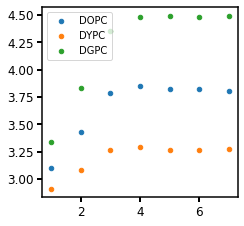

In [68]:
plt.plot(grid_plot,d_dopc_PL422,'.',label="DOPC")
plt.plot(grid_plot,d_dypc_PL422,'.',label="DYPC")
plt.plot(grid_plot,d_dgpc_PL422,'.',label="DGPC")
plt.legend()

In [62]:
data={'Distance [nm]':grid_plot,'dgpc':d_dgpc_PL422,'dypc':d_dypc_PL422,'dopc':d_dopc_PL422}
df=pd.DataFrame(data)
df.to_excel('deformation_PL422.xls')

In [70]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dopc-PL424/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dopc-PL424/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dopc_PL424=(avg_u-avg_l)/10

In [71]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dypc-PL424/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dypc-PL424/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dypc_PL424=(avg_u-avg_l)/10

In [72]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dgpc-PL424/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dgpc-PL424/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dgpc_PL424=(avg_u-avg_l)/10

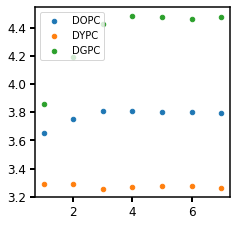

In [73]:
plt.plot(grid_plot,d_dopc_PL424,'.',label="DOPC")
plt.plot(grid_plot,d_dypc_PL424,'.',label="DYPC")
plt.plot(grid_plot,d_dgpc_PL424,'.',label="DGPC")
plt.legend()

In [74]:
data={'Distance [nm]':grid_plot,'dgpc':d_dgpc_PL424,'dypc':d_dypc_PL424,'dopc':d_dopc_PL424}
df=pd.DataFrame(data)
df.to_excel('deformation_PL424.xls')

In [82]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dopc-PL209/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dopc-PL209/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dopc_PL209=(avg_u-avg_l)/10

In [83]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dypc-PL209/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dypc-PL209/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dypc_PL209=(avg_u-avg_l)/10

In [84]:
u=md.Universe("/usr/people/home/steinkuehler/md/j_sim/dgpc-PL209/prod.gro","/usr/people/home/steinkuehler/md/j_sim/dgpc-PL209/prod.center.xtc")
[avg_l,avg_u]=get_avg(u,grid)
d_dgpc_PL209=(avg_u-avg_l)/10

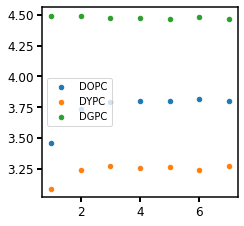

In [85]:
plt.plot(grid_plot,d_dopc_PL209,'.',label="DOPC")
plt.plot(grid_plot,d_dypc_PL209,'.',label="DYPC")
plt.plot(grid_plot,d_dgpc_PL209,'.',label="DGPC")
plt.legend()